### Plotagens que fiz de forma avulsa:


In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
data = pd.read_csv('milsa.csv')
data.head(3)

,Funcionario,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
0,1,solteiro,1o Grau,NaN,4.00,26,3,interior
1,2,casado,1o Grau,1.0,4.56,32,10,capital
2,3,casado,1o Grau,2.0,5.25,36,5,capital


In [ ]:
#data['Salario'] = data['Salario'].astype(int) # arrumando o tipo de variável na coluna salários

In [ ]:
data.groupby(['Est.civil', 'Inst']).size().unstack(1)
# função groupby faz agrupamento dos dados
# função size  retorna o tamanho (ou quantidade de registros) de cada combinação de estado civil e instrução.
# função unstack Reorganiza os resultados em um formato de tabela.
# O argumento 1 refere-se à segunda coluna usada no agrupamento, que é Inst.
# Isso transforma os valores da coluna Inst em colunas da nova tabela, criando uma tabela de contingência, onde o índice será os valores da coluna Est.civil e as colunas serão os valores de Inst.

Inst,1o Grau,2o Grau,Superior
Est.civil,,,
casado,5,12,3
solteiro,7,6,3


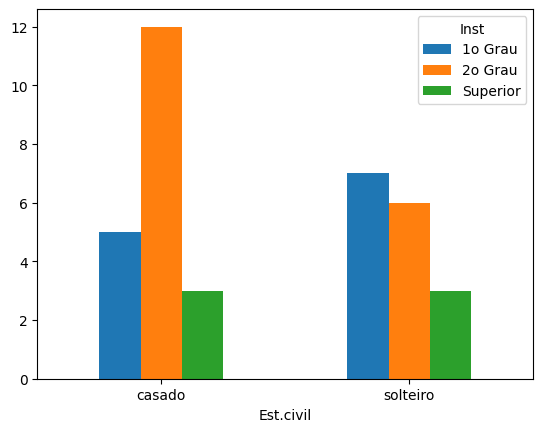

In [ ]:
ec_inst = data.groupby(['Est.civil', 'Inst']).size().unstack(1).plot.bar(rot=0)
# funções size e unstack idem explicação acima
# função plt.bar plota o grafico de barras
# parametro "rot=0" posiciona as barras no sentido vertical

In [ ]:
fig = px.box(data['Salario'], y='Salario', width=600, height=600)
fig.show()

In [ ]:
#fig = px.imshow(data1.corr(method='spearman').round(2), color_continuous_scale='plasma', text_auto=True) #função corr(method='spearman'), parâmetro method serve pra selecionar qual tipo de correlação dentre as 3 (pearson, spearman e kendall)
#fig.show()

# Script_TAE_Aula_7 convertido em python:
#### - Execução das linhas de código segue a mesma ordem de execução do script em R.

In [ ]:
#Quartis da variável Salario no arquivo milsa.csv
a = data['Salario'].quantile([0, 0.25, 0.5, 0.75, 1]).round(4) # função quantile com o parametro dado, retorna o valor dos quartis de  0% até 100%
a

,Salario
0.00,4.0000
0.25,7.5525
0.50,10.1650
0.75,14.0600
1.00,23.3000


In [ ]:
#Classes para variável Salario de acordo com os quantis
b = pd.cut(data['Salario'], bins=a, include_lowest=True, precision=2)

In [ ]:
# Tabela das frequencias absolutas das variáveis Nível de Instrução e Salario
fa_inst_sal = pd.crosstab(index=data['Inst'], columns=b, margins=True, margins_name='Total')
fa_inst_sal

Salario,"(3.99, 7.55]","(7.55, 10.16]","(10.16, 14.06]","(14.06, 23.3]",Total
Inst,,,,,
1o Grau,7,3,2,0,12
2o Grau,2,6,5,5,18
Superior,0,0,2,4,6
Total,9,9,9,9,36


In [ ]:
# Tabela das frequencias absolutas das variáveis Nível de Instrução e Salario
fa_inst_sal/fa_inst_sal.loc['Total', 'Total'].round(4)

Salario,"(3.99, 7.55]","(7.55, 10.16]","(10.16, 14.06]","(14.06, 23.3]",Total
Inst,,,,,
1o Grau,0.194444,0.083333,0.055556,0.000000,0.333333
2o Grau,0.055556,0.166667,0.138889,0.138889,0.500000
Superior,0.000000,0.000000,0.055556,0.111111,0.166667
Total,0.250000,0.250000,0.250000,0.250000,1.000000


In [ ]:
# Gráfico a ser apresentado é o Boxplot pois queremos comparar as estatísticas da variável Salario nas categorias da variável Inst
fig = px.box(data[['Salario', 'Inst']], x='Inst', y='Salario', width=600, height=600)
fig.show()